<center>
<img src='project4-logo.png' style="border-radius: 50%; width: 200px; height: 200px; object-fit: cover;">
</center>
<center><h1>Employee Attrition Risk Analysis</h1></center>
<center><p>HR Analytics Dashboard Dataset for Employee Attrition Analysis</p></center>
<h2>About Dataset</h2>
<p>This dataset is designed for analyzing employee attrition patterns and HR analytics using Power BI and other business intelligence tools. It includes 1,470 employee records with fields related to demographics, job satisfaction, compensation, and career progression.</p>
<h2>Source</h2>
<b>Kaggle: <a href="https://www.kaggle.com/datasets/anubhav761/hr-analytics-dashboard-employee-attrition/data">Attrition</a></b>

In [2]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('datasets/Cleaned_Employee_Data.xlsx')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

# 1. Preprocessing Data

## 1. Missing Data

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.isnull().sum().sum()

np.int64(0)

## 2. Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

## 3. Reduce Features

<strong>Removed features that were less informative for the EDA process</strong>

In [10]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.shape

(1470, 31)

In [12]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_cleaned.pkl', 'wb') as file:
    pickle.dump(df, file)

# 2. Exploratory Data Analysis (EDA)

In [3]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

## 1. Demographic & Personal Information

<p>In this pahse we will use the features:</p>
<ul>
<li>Age</li>
<li>Gender</li>
<li>Marital Status</li>
<li>Education</li>
<li>Education Field</li>
</ul>

In [5]:
df[['Attrition','Gender','MaritalStatus','Education','EducationField']].dtypes

Attrition         object
Gender            object
MaritalStatus     object
Education          int64
EducationField    object
dtype: object

In [6]:
df[['Attrition','Gender','MaritalStatus','Education','EducationField']].head()

,Attrition,Gender,MaritalStatus,Education,EducationField
0,Yes,Female,Single,2,Life Sciences
1,No,Male,Married,1,Life Sciences
2,Yes,Male,Single,2,Other
3,No,Female,Married,4,Life Sciences
4,No,Male,Married,1,Medical


In [5]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

In [6]:
df['EducationLevel'] = df['Education'].map(education_map)
df[['Attrition','Gender','MaritalStatus','Education','EducationLevel','EducationField']].head()

,Attrition,Gender,MaritalStatus,Education,EducationLevel,EducationField
0,Yes,Female,Single,2,College,Life Sciences
1,No,Male,Married,1,Below College,Life Sciences
2,Yes,Male,Single,2,College,Other
3,No,Female,Married,4,Master,Life Sciences
4,No,Male,Married,1,Below College,Medical


In [9]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

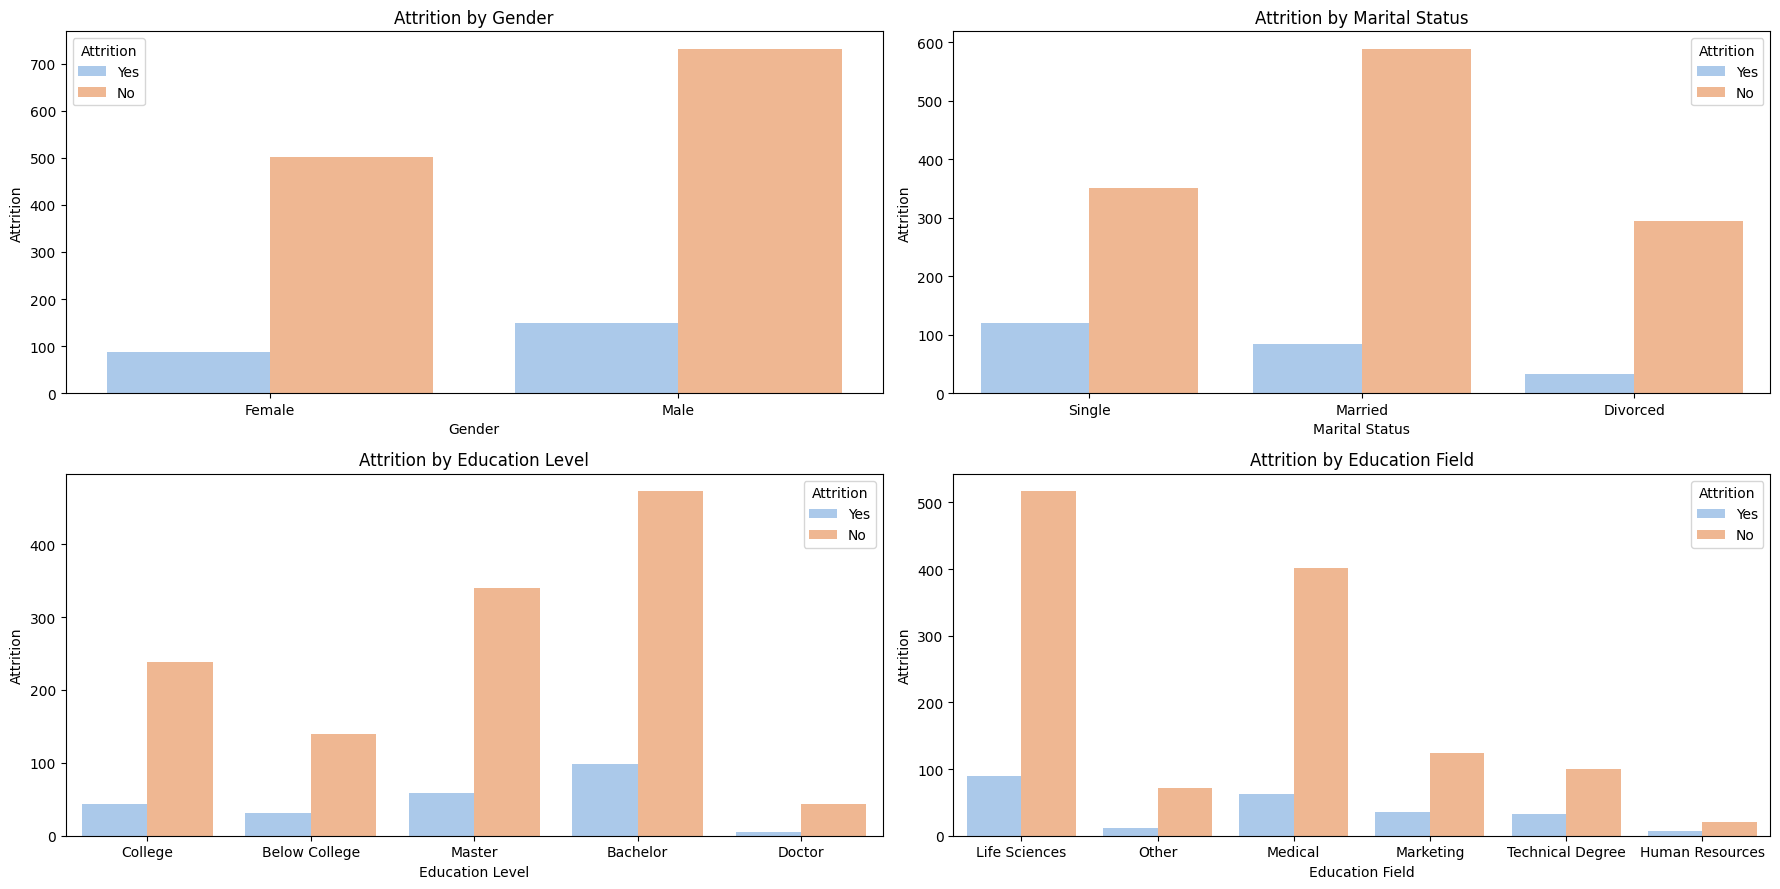

In [ ]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(18,9))
# Plot 1
sns.countplot(data=df, x='Gender', hue='Attrition', palette='pastel', ax=axs[0,0])
axs[0, 0].set_title('Attrition by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', palette='pastel', ax=axs[0,1])
axs[0, 1].set_title('Attrition by Marital Status')
axs[0, 1].set_xlabel('Marital Status')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='EducationLevel', hue='Attrition', palette='pastel', ax=axs[1,0])
axs[1, 0].set_title('Attrition by Education Level')
axs[1, 0].set_xlabel('Education Level')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='EducationField', hue='Attrition', palette='pastel', ax=axs[1,1])
axs[1, 1].set_title('Attrition by Education Field')
axs[1, 1].set_xlabel('Education Field')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Show Plot
plt.tight_layout()
plt.show()

<strong>Normalizing "relative proportions" to eliminate bias effects due to differences in the number of observations between categories</strong>

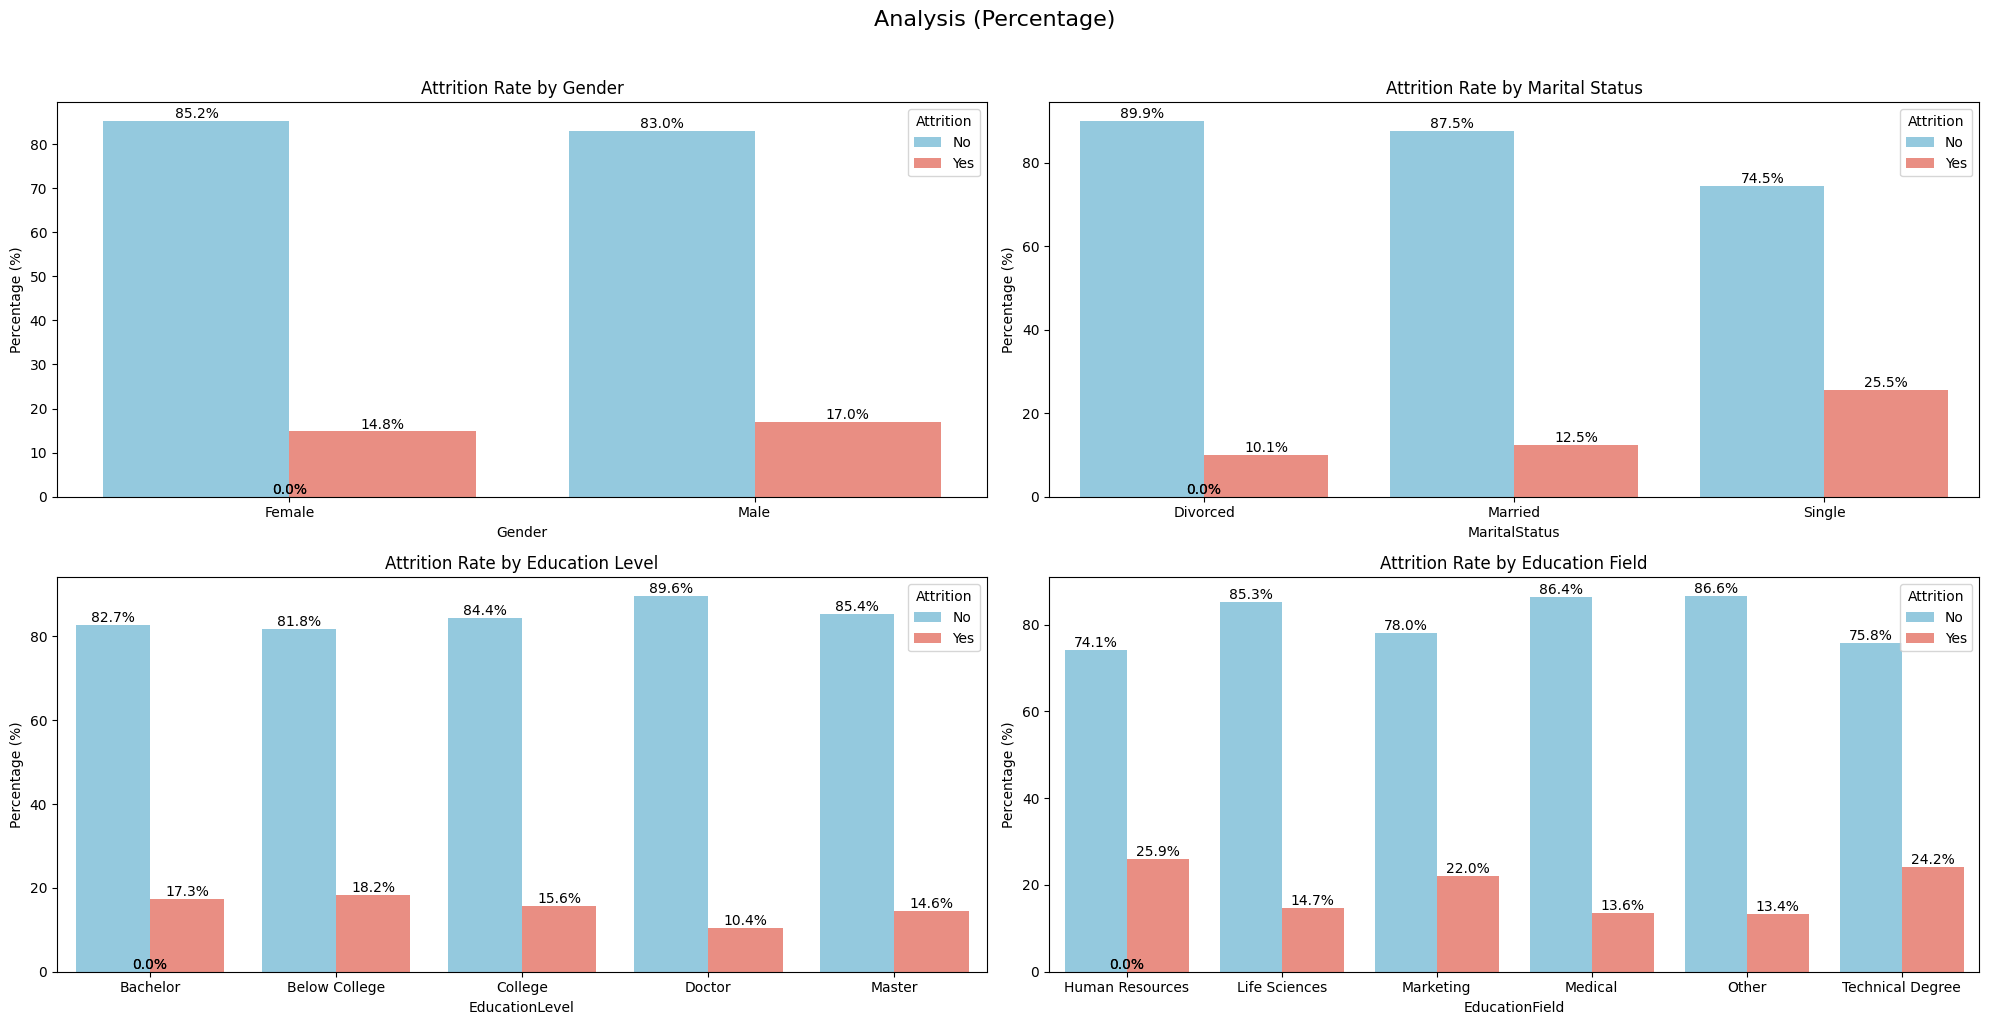

In [7]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2,figsize=(20,10))
plt.suptitle('Analysis (Percentage)', fontsize=16, y=1.02)

# Function to plot Attrition percentage
def plot_percentage(data, x_var, ax, title):
    # Calculate Attrition percentage per category
    cross_tab = pd.crosstab(data[x_var], data['Attrition'], normalize='index') * 100
    cross_tab = cross_tab.reset_index().melt(id_vars=x_var, var_name='Attrition', value_name='Percentage')
    # Plot
    sns.barplot(data=cross_tab, x=x_var, y='Percentage', hue='Attrition', palette=['skyblue', 'salmon'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_var)
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Attrition')
    # Adds a percentage value above the bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
# Plot 1
plot_percentage(df, 'Gender', axs[0, 0], 'Attrition Rate by Gender')
# Plot 2
plot_percentage(df, 'MaritalStatus', axs[0, 1], 'Attrition Rate by Marital Status')
# Plot 3
plot_percentage(df, 'EducationLevel', axs[1, 0], 'Attrition Rate by Education Level')
# Plot 4
plot_percentage(df, 'EducationField', axs[1, 1], 'Attrition Rate by Education Field')

# Adjust Layout
plt.tight_layout()
plt.savefig('results/demographic_and_personal_information_analysis.png')
plt.show()

## 2. Jobs & Titles

<p>In this pahse we will use the features:</p>
<ul>
<li>Department</li>
<li>Job Role</li>
<li>Job Level</li>
<li>Job Involvement</li>
<li>Job Satisfaction</li>
<li>Performance Rating</li>
<li>Over Time</li>
<li>Business Travel</li>
</ul>

In [8]:
df[['Attrition','Department','JobRole','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','OverTime','BusinessTravel']].head()

,Attrition,Department,JobRole,JobLevel,JobInvolvement,JobSatisfaction,PerformanceRating,OverTime,BusinessTravel
0,Yes,Sales,Sales Executive,2,3,4,3,Yes,Travel_Rarely
1,No,Research & Development,Research Scientist,2,2,2,4,No,Travel_Frequently
2,Yes,Research & Development,Laboratory Technician,1,2,3,3,Yes,Travel_Rarely
3,No,Research & Development,Research Scientist,1,3,3,3,Yes,Travel_Frequently
4,No,Research & Development,Laboratory Technician,1,3,2,3,No,Travel_Rarely


In [12]:
df[['Attrition','Department','JobRole','JobLevel','JobInvolvement','JobSatisfaction','PerformanceRating','OverTime','BusinessTravel']].nunique()

Attrition            2
Department           3
JobRole              9
JobLevel             5
JobInvolvement       4
JobSatisfaction      4
PerformanceRating    2
OverTime             2
BusinessTravel       3
dtype: int64

In [13]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [14]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

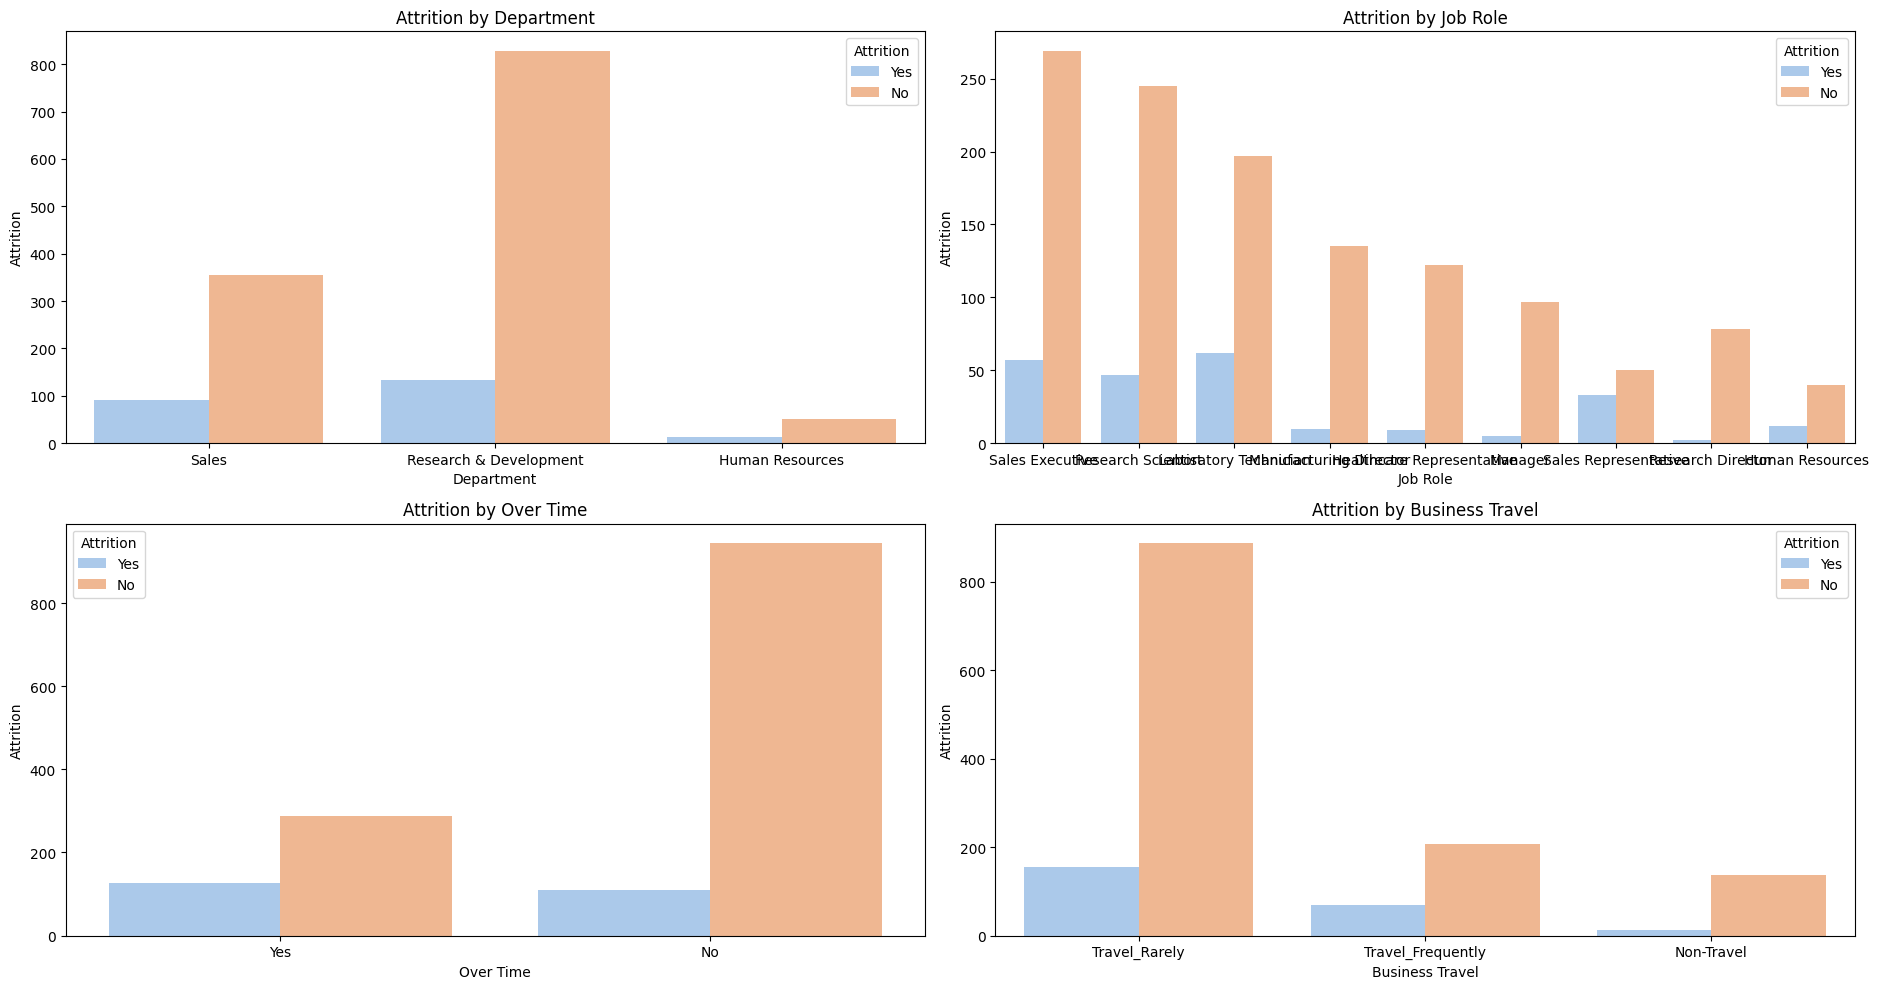

In [21]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(19, 10))
# Plot 1
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Attrition by Department')
axs[0, 0].set_xlabel('Department')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Attrition by Job Role')
axs[0, 1].set_xlabel('Job Role')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Attrition by Over Time')
axs[1, 0].set_xlabel('Over Time')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Attrition by Business Travel')
axs[1, 1].set_xlabel('Business Travel')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Shwo plot
plt.tight_layout()
plt.show()

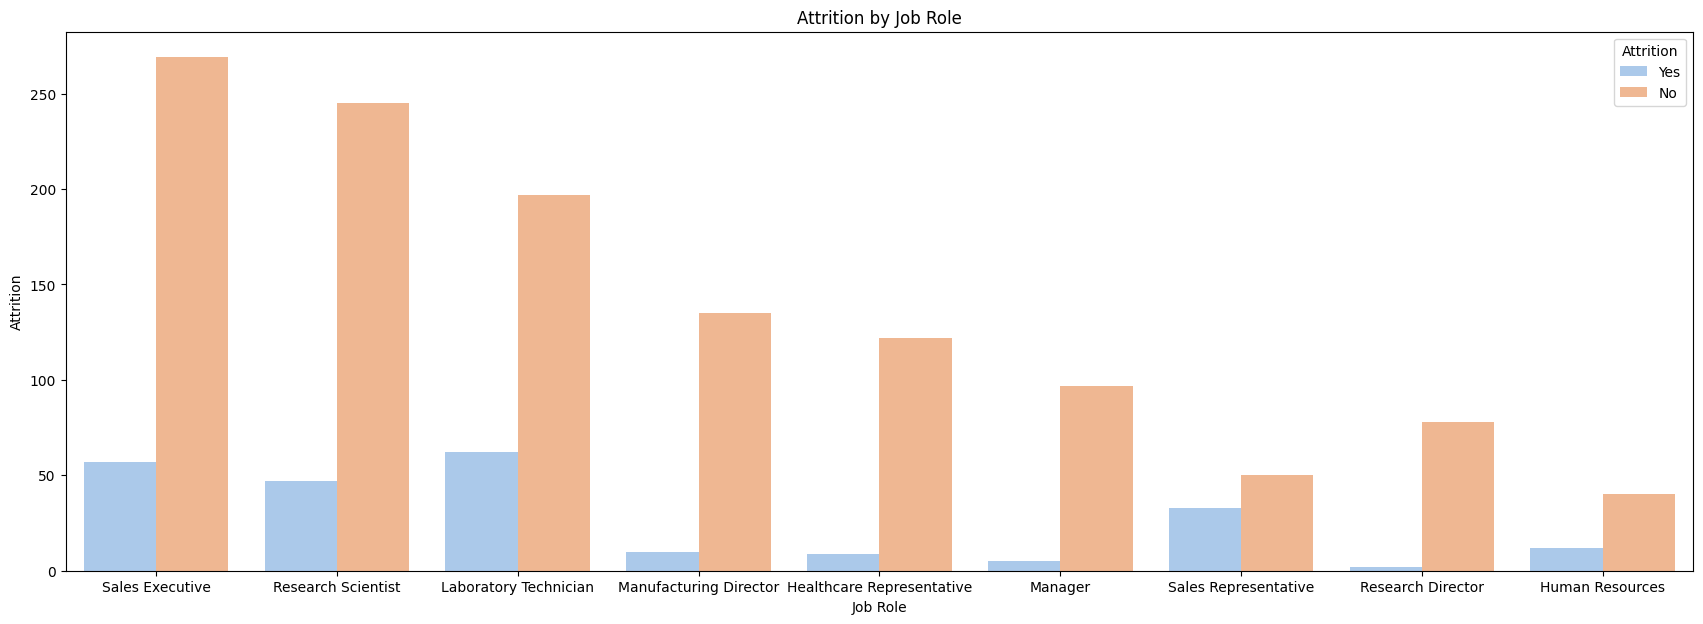

In [ ]:
# Clear visualization for Job Role
plt.figure(figsize=(21, 7))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette='pastel')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition')
plt.legend(title='Attrition')
plt.show()


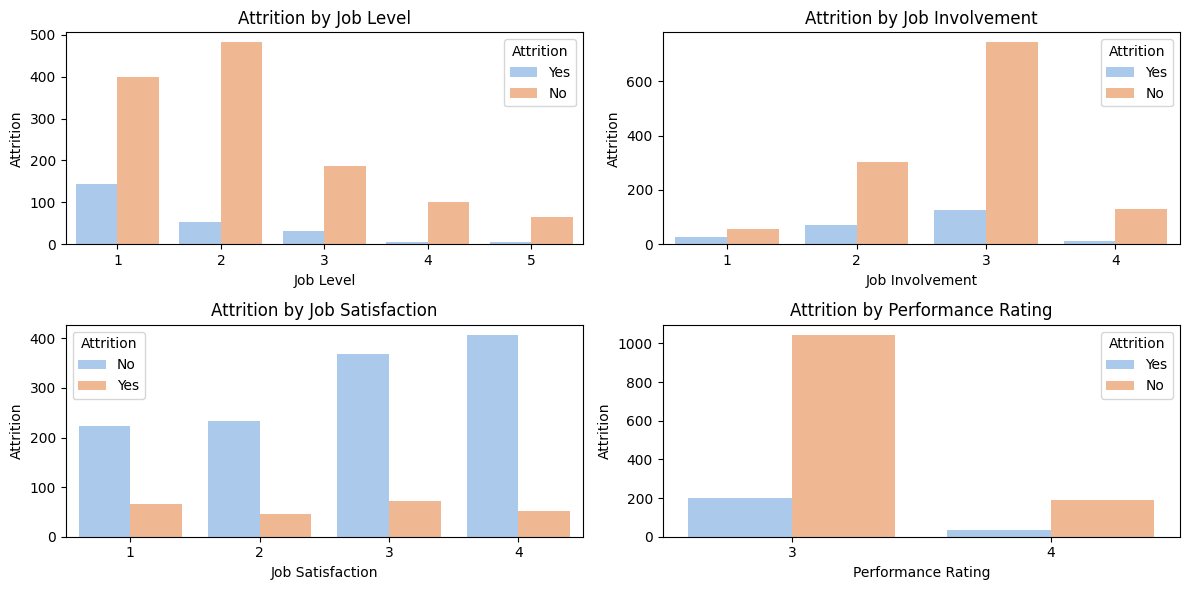

In [28]:
# Figure with several sub plots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
# Plot 1
sns.countplot(data=df, x='JobLevel', hue='Attrition', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Attrition by Job Level')
axs[0, 0].set_xlabel('Job Level')
axs[0, 0].set_ylabel('Attrition')
axs[0, 0].legend(title='Attrition')

# Plot 2
sns.countplot(data=df, x='JobInvolvement', hue='Attrition', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Attrition by Job Involvement')
axs[0, 1].set_xlabel('Job Involvement')
axs[0, 1].set_ylabel('Attrition')
axs[0, 1].legend(title='Attrition')

# Plot 3
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Attrition by Job Satisfaction')
axs[1, 0].set_xlabel('Job Satisfaction')
axs[1, 0].set_ylabel('Attrition')
axs[1, 0].legend(title='Attrition')

# Plot 4
sns.countplot(data=df, x='PerformanceRating', hue='Attrition', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Attrition by Performance Rating')
axs[1, 1].set_xlabel('Performance Rating')
axs[1, 1].set_ylabel('Attrition')
axs[1, 1].legend(title='Attrition')

# Shwo plot
plt.tight_layout()
plt.show()

<p><strong>Normalizing "relative proportions" to eliminate bias effects due to differences in the number of observations between categories</strong> Using pre-made "functions". </p>

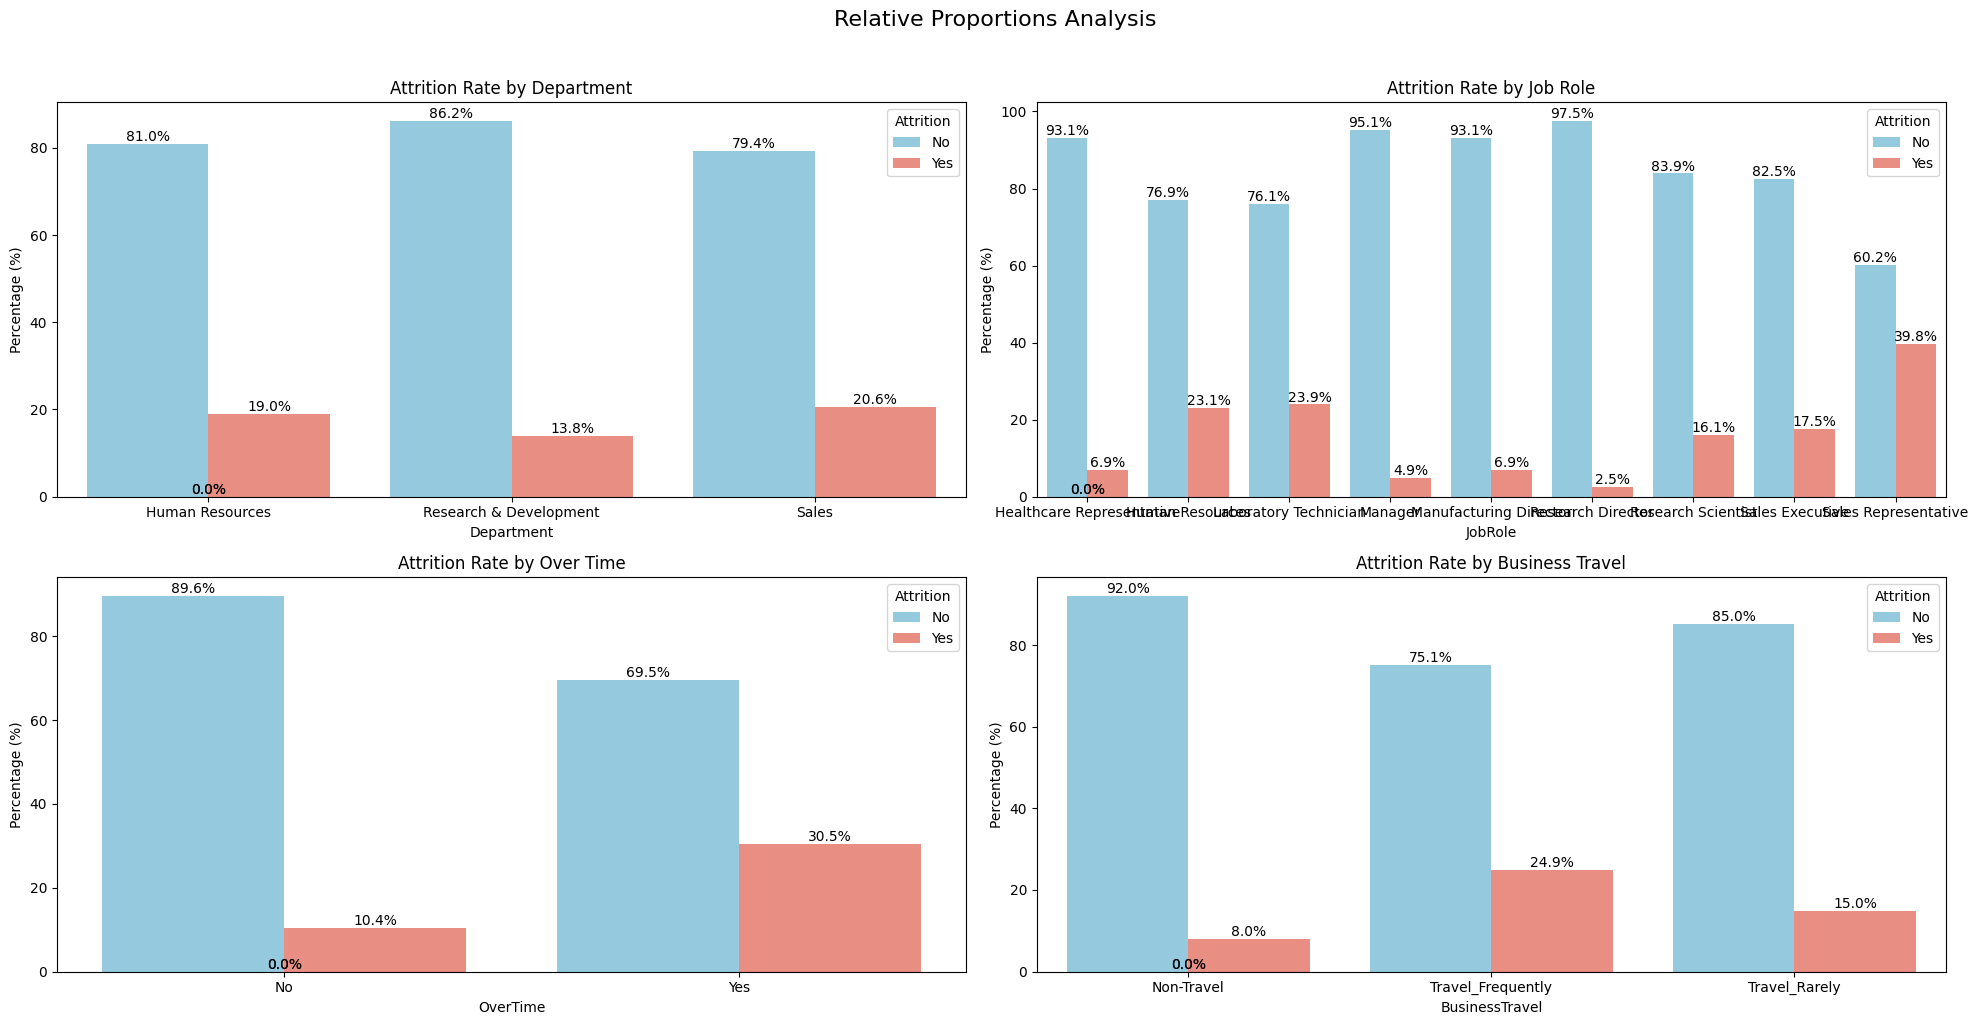

In [8]:
# Vizualiton
fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.suptitle('Relative Proportions Analysis', fontsize=16, y=1.02)
# Plot 1
plot_percentage(df, 'Department', axs[0, 0], 'Attrition Rate by Department')
# plot 2
plot_percentage(df, 'JobRole', axs[0, 1], 'Attrition Rate by Job Role')
# plot 3
plot_percentage(df, 'OverTime', axs[1, 0], 'Attrition Rate by Over Time')
# plot 4
plot_percentage(df, 'BusinessTravel', axs[1, 1], 'Attrition Rate by Business Travel')

# Show the plot
plt.tight_layout()
plt.show()

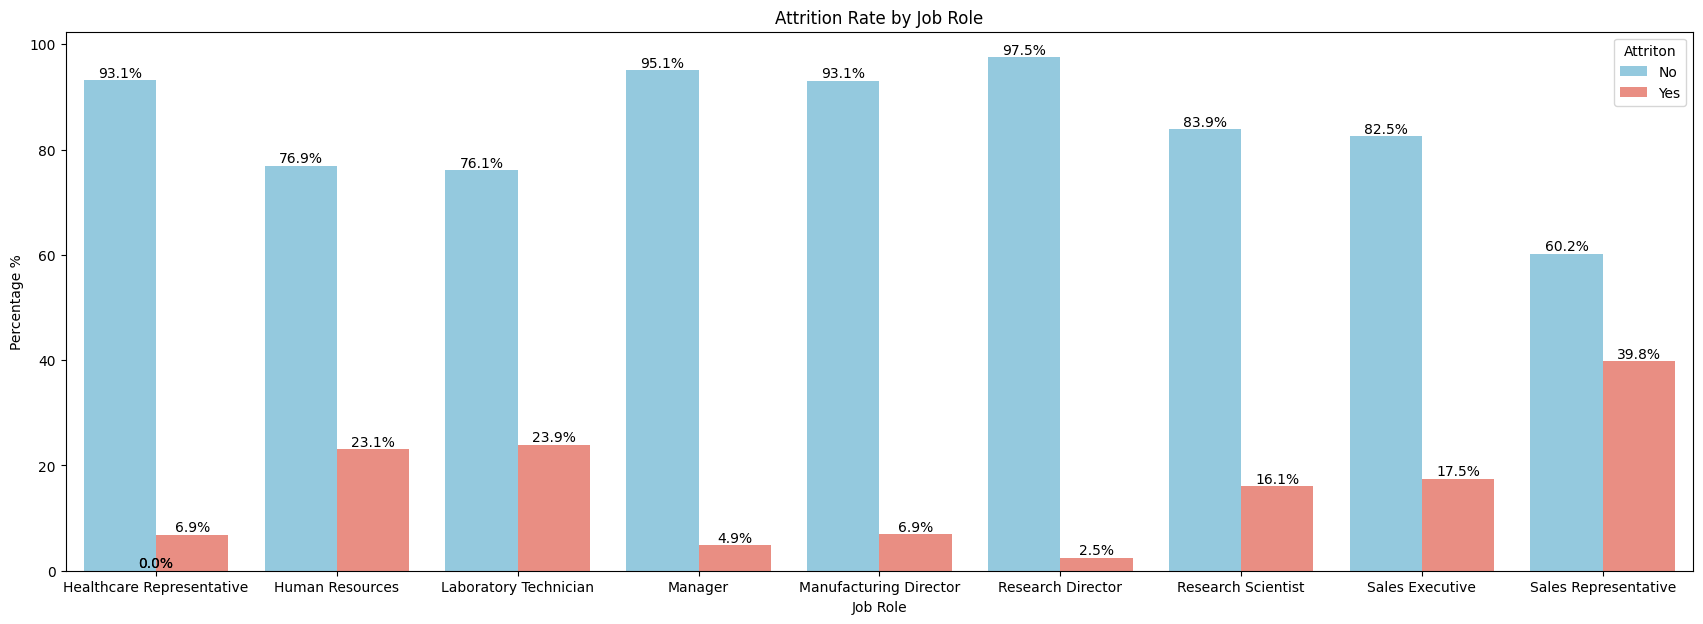

In [11]:
plt.figure(figsize=(21, 7))
cross_tab = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.reset_index().melt(id_vars='JobRole', var_name='Attrition', value_name='Percentage')
sns.barplot(data=cross_tab, x='JobRole', y='Percentage', hue='Attrition', palette=['skyblue', 'salmon'])
plt.title('Attrition Rate by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage %')
plt.legend(title='Attriton')
for p in plt.gca().patches:
        plt.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


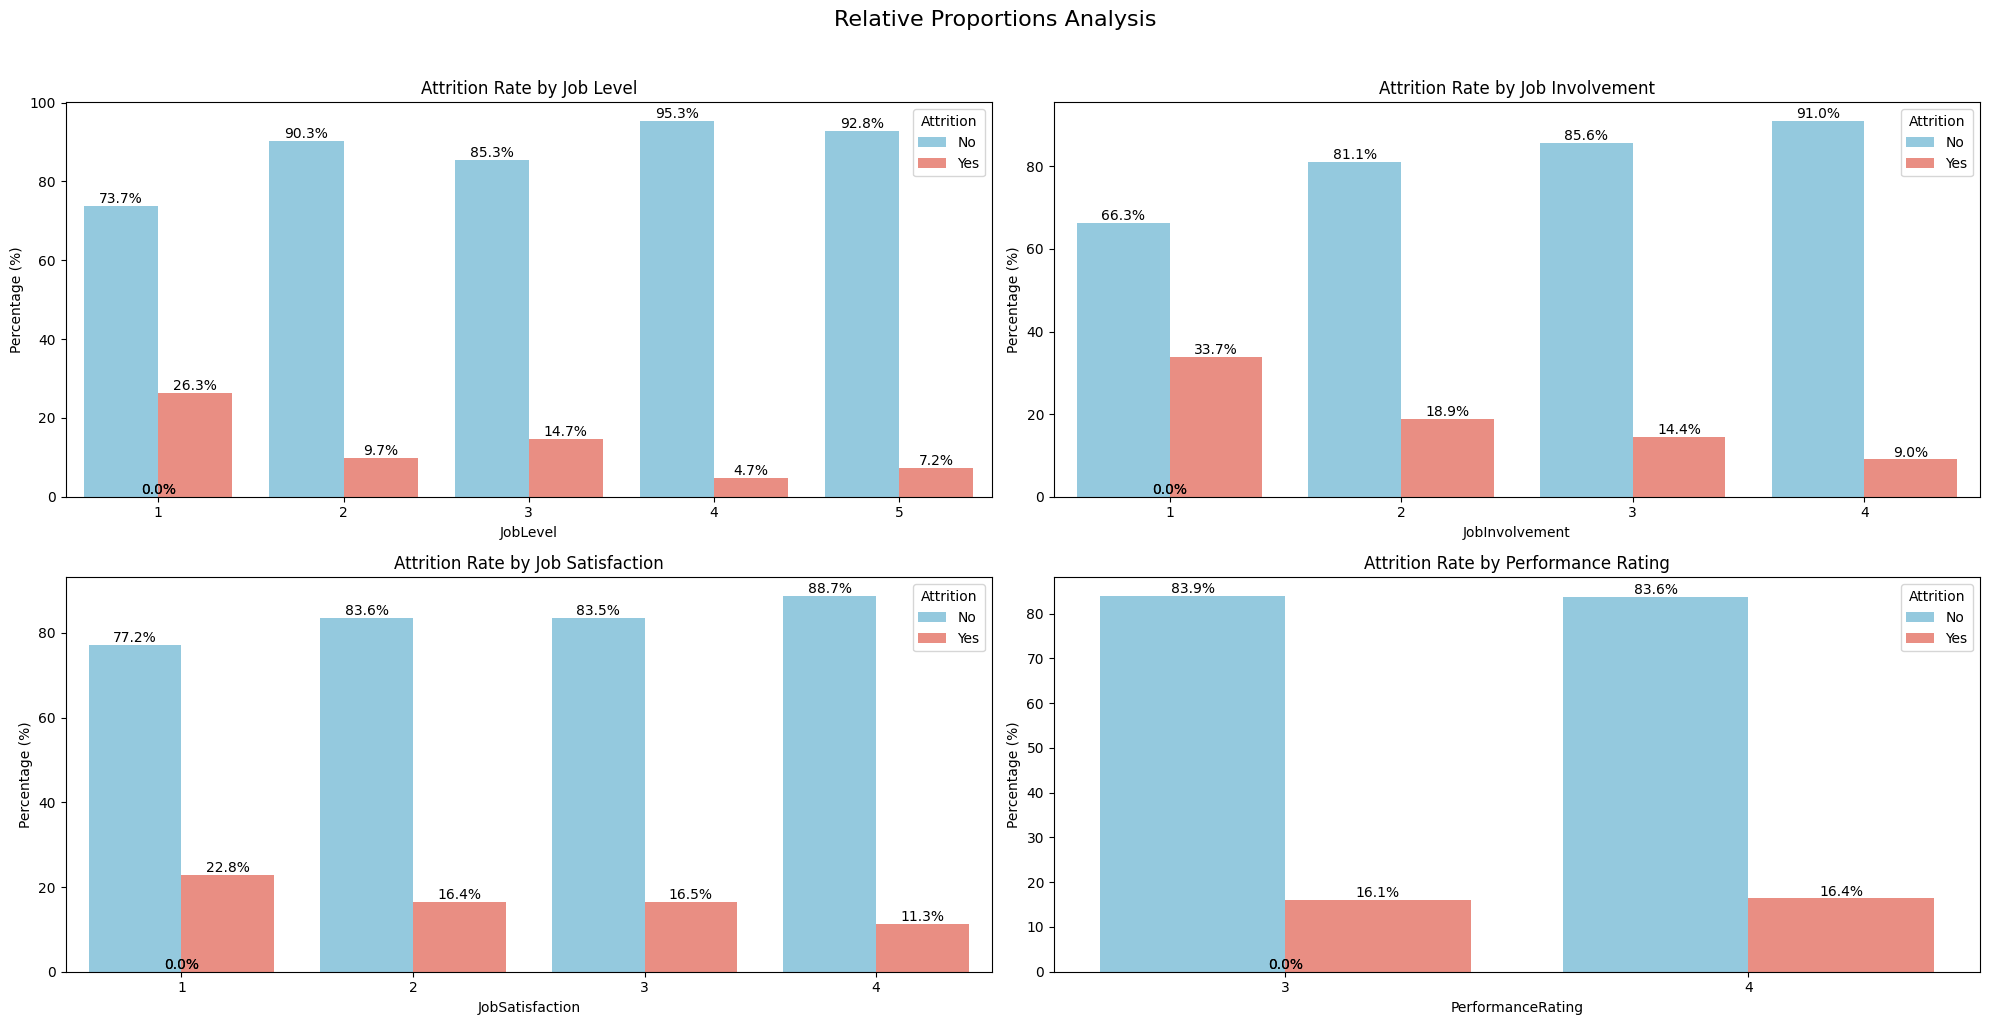

In [12]:
# Vizualiton
fig, axs = plt.subplots(2,2, figsize=(20,10))
plt.suptitle('Relative Proportions Analysis', fontsize=16, y=1.02)
# Plot 1
plot_percentage(df, 'JobLevel', axs[0, 0], 'Attrition Rate by Job Level')
# plot 2
plot_percentage(df, 'JobInvolvement', axs[0, 1], 'Attrition Rate by Job Involvement')
# plot 3
plot_percentage(df, 'JobSatisfaction', axs[1, 0], 'Attrition Rate by Job Satisfaction')
# plot 4
plot_percentage(df, 'PerformanceRating', axs[1, 1], 'Attrition Rate by Performance Rating')

# Show the plot
plt.tight_layout()
plt.show()

## 3. Compensation & Finance

<p>In this pahse we will use the features:</p>
<ul>
<li>Daily Rate</li>
<li>Hourly Rate</li>
<li>Monthly Income</li>
<li>Monthly Rate</li>
<li>Percent Salary Hike</li>
<li>Stock Option Level</li>
</ul>

In [3]:
df[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','StockOptionLevel']].head()

,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel
0,1102,94,5993,19479,11,0
1,279,61,5130,24907,23,1
2,1373,92,2090,2396,15,0
3,1392,56,2909,23159,11,0
4,591,40,3468,16632,12,1


In [4]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2])

In [5]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

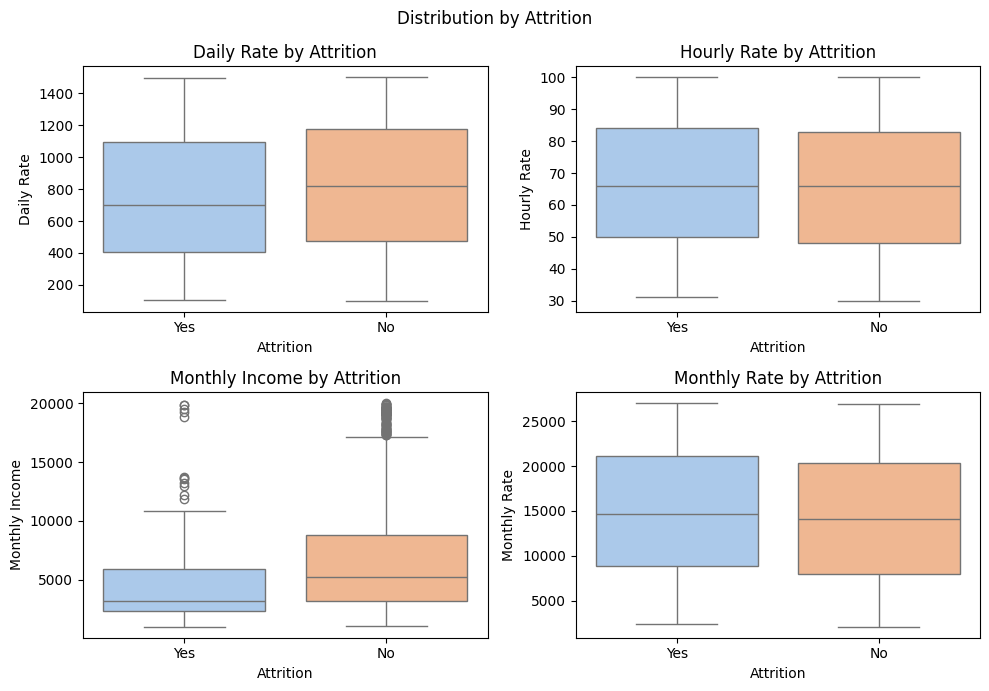

In [11]:
# Vizualization for distribution
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Distribution by Attrition')

# Plot 1
sns.boxplot(data=df, x='Attrition', y='DailyRate', palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Daily Rate by Attrition')
axs[0, 0].set_xlabel('Attrition')
axs[0, 0].set_ylabel('Daily Rate')

# Plot 2
sns.boxplot(data=df, x='Attrition', y='HourlyRate', palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Hourly Rate by Attrition')
axs[0, 1].set_xlabel('Attrition')
axs[0, 1].set_ylabel('Hourly Rate')

# Plot 3
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Income by Attrition')
axs[1, 0].set_xlabel('Attrition')
axs[1, 0].set_ylabel('Monthly Income')

# Plot 1
sns.boxplot(data=df, x='Attrition', y='MonthlyRate', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Monthly Rate by Attrition')
axs[1, 1].set_xlabel('Attrition')
axs[1, 1].set_ylabel('Monthly Rate')

# show the plot
plt.tight_layout()
plt.show()

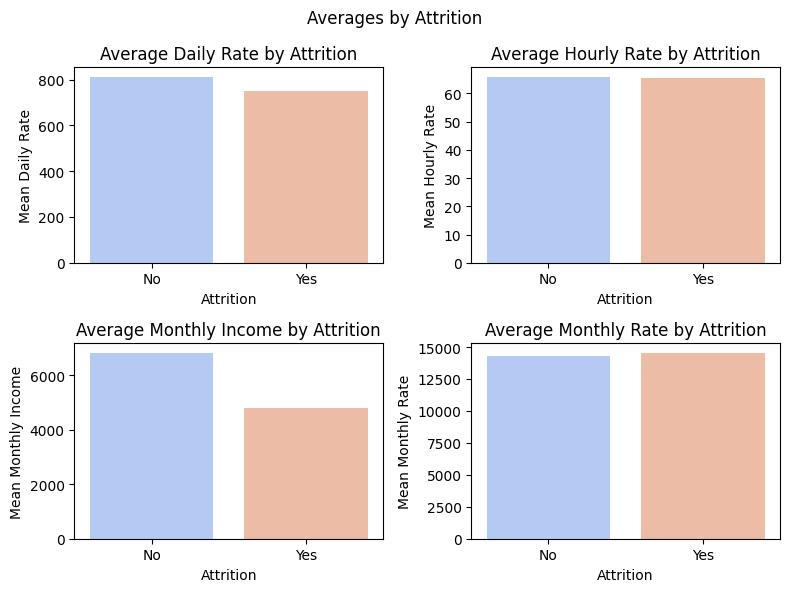

In [9]:
# Mean for each features
mean_drate = df.groupby('Attrition')['DailyRate'].mean().reset_index()
mean_hrate = df.groupby('Attrition')['HourlyRate'].mean().reset_index()
mean_mincome = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
mean_mrate = df.groupby('Attrition')['MonthlyRate'].mean().reset_index()

# Bar chart
fig, axs  = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Averages by Attrition')

# Plot 1
sns.barplot(data=mean_drate, x='Attrition', y='DailyRate', palette='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Average Daily Rate by Attrition')
axs[0, 0].set_xlabel('Attrition')
axs[0, 0].set_ylabel('Mean Daily Rate')

# Plot 2
sns.barplot(data=mean_hrate, x='Attrition', y='HourlyRate', palette='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Average Hourly Rate by Attrition')
axs[0, 1].set_xlabel('Attrition')
axs[0, 1].set_ylabel('Mean Hourly Rate')

# Plot 3
sns.barplot(data=mean_mincome, x='Attrition', y='MonthlyIncome', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Average Monthly Income by Attrition')
axs[1, 0].set_xlabel('Attrition')
axs[1, 0].set_ylabel('Mean Monthly Income')

# Plot 4
sns.barplot(data=mean_mrate, x='Attrition', y='MonthlyRate', palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Average Monthly Rate by Attrition')
axs[1, 1].set_xlabel('Attrition')
axs[1, 1].set_ylabel('Mean Monthly Rate')

# Show the plot
plt.tight_layout()
plt.show()